In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
from tensorflow import keras
from functools import partial

def get_run_logdir(prefix=""):
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S" + prefix)
    return os.path.join("/home/infodba/Documents/study/hands_on_ml2/my_logs/", run_id)

# Vanishing/Exploding Gradients Problem

## Nonsaturating Activation Functions

### Leaky ReLU

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#нормализация данных
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [4]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 10s 184us/sample - loss: 1.2810 - accuracy: 0.6205 - val_loss: 0.8869 - val_accuracy: 0.7160
Epoch 2/10
55000/55000 [==============================] - 10s 176us/sample - loss: 0.7952 - accuracy: 0.7369 - val_loss: 0.7132 - val_accuracy: 0.7626
Epoch 3/10
55000/55000 [==============================] - 10s 180us/sample - loss: 0.6817 - accuracy: 0.7726 - val_loss: 0.6385 - val_accuracy: 0.7894
Epoch 4/10
55000/55000 [==============================] - 10s 179us/sample - loss: 0.6219 - accuracy: 0.7942 - val_loss: 0.5931 - val_accuracy: 0.8016
Epoch 5/10
55000/55000 [==============================] - 10s 177us/sample - loss: 0.5830 - accuracy: 0.8074 - val_loss: 0.5607 - val_accuracy: 0.8172
Epoch 6/10
55000/55000 [==============================] - 10s 176us/sample - loss: 0.5552 - accuracy: 0.8173 - val_loss: 0.5355 - val_accuracy: 0.8238
Epoch 7/10
55000/55000 [=====================

Теперь попробуем PReLU:

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 11s 199us/sample - loss: 1.3452 - accuracy: 0.6203 - val_loss: 0.9241 - val_accuracy: 0.7170
Epoch 2/10
55000/55000 [==============================] - 10s 186us/sample - loss: 0.8196 - accuracy: 0.7364 - val_loss: 0.7314 - val_accuracy: 0.7602
Epoch 3/10
55000/55000 [==============================] - 11s 194us/sample - loss: 0.6970 - accuracy: 0.7701 - val_loss: 0.6517 - val_accuracy: 0.7878
Epoch 4/10
55000/55000 [==============================] - 11s 197us/sample - loss: 0.6333 - accuracy: 0.7914 - val_loss: 0.6032 - val_accuracy: 0.8056
Epoch 5/10
55000/55000 [==============================] - 10s 187us/sample - loss: 0.5917 - accuracy: 0.8049 - val_loss: 0.5689 - val_accuracy: 0.8162
Epoch 6/10
55000/55000 [==============================] - 10s 185us/sample - loss: 0.5619 - accuracy: 0.8143 - val_loss: 0.5417 - val_accuracy: 0.8224
Epoch 7/10
55000/55000 [=====================

Теперь попробуем SELU для глубокой нейросети:

In [4]:
#нормализация данных
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [11]:
pixel_means.shape

(1, 28, 28)

In [28]:
tf.random.set_seed(42)
np.random.seed(42)

#инициализация для selu должна быть lecun, а архитектура должна быть последовательная и глубокая
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))

for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))

model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 54s 979us/sample - loss: 1.2646 - accuracy: 0.5128 - val_loss: 1.2577 - val_accuracy: 0.5758
Epoch 2/10
55000/55000 [==============================] - 49s 896us/sample - loss: 0.7850 - accuracy: 0.7119 - val_loss: 1.1055 - val_accuracy: 0.5730
Epoch 3/10
55000/55000 [==============================] - 52s 937us/sample - loss: 1.0468 - accuracy: 0.6044 - val_loss: 0.9671 - val_accuracy: 0.6326
Epoch 4/10
55000/55000 [==============================] - 52s 945us/sample - loss: 0.8668 - accuracy: 0.6844 - val_loss: 0.8634 - val_accuracy: 0.6926
Epoch 5/10
55000/55000 [==============================] - 51s 933us/sample - loss: 0.6951 - accuracy: 0.7502 - val_loss: 0.6166 - val_accuracy: 0.7842
Epoch 6/10
55000/55000 [==============================] - 50s 911us/sample - loss: 0.5926 - accuracy: 0.7882 - val_loss: 0.5632 - val_accuracy: 0.8058
Epoch 7/10
55000/55000 [=====================

посмотрим что произойдет при использовании в той же модели стандартной relu

In [29]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 51s 925us/sample - loss: 1.7503 - accuracy: 0.2867 - val_loss: 1.3841 - val_accuracy: 0.3664
Epoch 2/10
55000/55000 [==============================] - 46s 839us/sample - loss: 1.1652 - accuracy: 0.5032 - val_loss: 0.9573 - val_accuracy: 0.6172
Epoch 3/10
55000/55000 [==============================] - 46s 842us/sample - loss: 1.0822 - accuracy: 0.5459 - val_loss: 1.0975 - val_accuracy: 0.5280
Epoch 4/10
55000/55000 [==============================] - 46s 842us/sample - loss: 0.9150 - accuracy: 0.6196 - val_loss: 0.8545 - val_accuracy: 0.6852
Epoch 5/10
55000/55000 [==============================] - 48s 874us/sample - loss: 0.8962 - accuracy: 0.6392 - val_loss: 0.8214 - val_accuracy: 0.6592
Epoch 6/10
55000/55000 [==============================] - 48s 876us/sample - loss: 0.8147 - accuracy: 0.6832 - val_loss: 0.8154 - val_accuracy: 0.6878
Epoch 7/10
55000/55000 [=====================

результат чуть хуже, наверное чтобы проблема "Vanishing/Exploding Gradients" проявилась ярче нужно еще больше скрытых слоев.

## Batch Normalization

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

после входного слоя BN дает 4 дополнительных параметра γ, β, μ и σ для каждого входящего значения, т.о. получается 28х28х4=3136. Параметры μ и σ не корректируются в процессе обратного распространения ошибки. Рассмотрим параметры первого BN слоя

In [9]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

Т.о. два параметра обучаемые (в процессе обратного распространения), другие два - нет.

In [10]:
model.layers[1].updates

[<tf.Operation 'cond/Identity' type=Identity>,
 <tf.Operation 'cond_1/Identity' type=Identity>]

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 15s 267us/sample - loss: 0.8317 - accuracy: 0.7230 - val_loss: 0.5517 - val_accuracy: 0.8130
Epoch 2/10
55000/55000 [==============================] - 13s 237us/sample - loss: 0.5671 - accuracy: 0.8047 - val_loss: 0.4763 - val_accuracy: 0.8386
Epoch 3/10
55000/55000 [==============================] - 13s 239us/sample - loss: 0.5129 - accuracy: 0.8213 - val_loss: 0.4416 - val_accuracy: 0.8478
Epoch 4/10
55000/55000 [==============================] - 13s 236us/sample - loss: 0.4812 - accuracy: 0.8319 - val_loss: 0.4186 - val_accuracy: 0.8542
Epoch 5/10
55000/55000 [==============================] - 13s 239us/sample - loss: 0.4567 - accuracy: 0.8395 - val_loss: 0.4045 - val_accuracy: 0.8604
Epoch 6/10
55000/55000 [==============================] - 13s 242us/sample - loss: 0.4413 - accuracy: 0.8458 - val_loss: 0.3929 - val_accuracy: 0.8624
Epoch 7/10
55000/55000 [=====================

Иногда размещение слоя BN перед фукнцией активации работает лучше. Кроме того отключим параметр смещения в скрытых слоях нейронов

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 14s 263us/sample - loss: 1.0214 - accuracy: 0.6848 - val_loss: 0.6579 - val_accuracy: 0.7900
Epoch 2/10
55000/55000 [==============================] - 13s 231us/sample - loss: 0.6595 - accuracy: 0.7874 - val_loss: 0.5467 - val_accuracy: 0.8186
Epoch 3/10
55000/55000 [==============================] - 13s 232us/sample - loss: 0.5820 - accuracy: 0.8055 - val_loss: 0.4972 - val_accuracy: 0.8332
Epoch 4/10
55000/55000 [==============================] - 12s 222us/sample - loss: 0.5378 - accuracy: 0.8194 - val_loss: 0.4657 - val_accuracy: 0.8440
Epoch 5/10
55000/55000 [==============================] - 12s 227us/sample - loss: 0.5071 - accuracy: 0.8267 - val_loss: 0.4433 - val_accuracy: 0.8474
Epoch 6/10
55000/55000 [==============================] - 14s 248us/sample - loss: 0.4882 - accuracy: 0.8318 - val_loss: 0.4265 - val_accuracy: 0.8522
Epoch 7/10
55000/55000 [=====================

# Reusing Pretrained Layers

Разделим набор данных fashion MNIST на два набора:

- набор A не будет содержать сандали и рубашки, но содержит остальные 8 классов;
- набор B будет содержить рубашки и сандали. А задача соответствуюещго классификатора будет сведена к бинарной классификации, где позитивный класс - рубашки, неготивный - сандали

In [6]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # булевый массив указывающий на рубкаши и сандали
    y_A = y[~y_5_or_6] # labels данные для набора A
    X_A = X[~y_5_or_6] # data данные для набора А
    y_A[y_A > 6] -= 2 # индексы классов 7, 8, 9 должны стать индексами 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # labels данные для набора B (рубашки - положительный класс)
    X_B = X[y_5_or_6]
    return ((X_A, y_A), (X_B, y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

#эмуляция того, что наш набор обучения очень мал
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [7]:
print(X_train_A.shape)
print(X_train_B.shape)
print(y_train_A[:30])
print(y_train_B[:30])

(43986, 28, 28)
(200, 28, 28)
[4 0 5 7 7 7 4 4 3 4 0 1 6 3 4 3 2 6 5 3 4 5 1 3 4 2 0 6 7 1]
[1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1.]


Поскольку для целей текущей задачи мы считаем что у нас есть некоторая обученная модель A, которую мы будем использовать для обучения модели B, а именно будет использовать веса скрытых слоев модели A, но самой модели A у нас нет - обучим ее

In [8]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Train on 43986 samples, validate on 4014 samples
Epoch 1/20
43986/43986 [==============================] - 8s 185us/sample - loss: 0.5779 - accuracy: 0.8141 - val_loss: 0.3651 - val_accuracy: 0.8777
Epoch 2/20
43986/43986 [==============================] - 6s 137us/sample - loss: 0.3497 - accuracy: 0.8802 - val_loss: 0.3139 - val_accuracy: 0.8926
Epoch 3/20
43986/43986 [==============================] - 6s 131us/sample - loss: 0.3139 - accuracy: 0.8912 - val_loss: 0.2940 - val_accuracy: 0.9003
Epoch 4/20
43986/43986 [==============================] - 6s 136us/sample - loss: 0.2949 - accuracy: 0.8975 - val_loss: 0.2845 - val_accuracy: 0.9033
Epoch 5/20
43986/43986 [==============================] - 6s 132us/sample - loss: 0.2815 - accuracy: 0.9034 - val_loss: 0.2779 - val_accuracy: 0.9053
Epoch 6/20
43986/43986 [==============================] - 6s 143us/sample - loss: 0.2718 - accuracy: 0.9071 - val_loss: 0.2639 - val_accuracy: 0.9113
Epoch 7/20
43986/43986 [===========================

In [9]:
model_A.save("my_model_A.h5")

Создадим модель B и обучим на имеющимся (маленьком) обучающем наборе. В дальнейшем эта модель будет использоваться для сравннения с моделью на наборе B, которая будет использовать обученные слои модели A 

In [10]:
model_B = keras.models.Sequential()

model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 4ms/sample - loss: 0.7442 - accuracy: 0.5500 - val_loss: 0.6407 - val_accuracy: 0.6389
Epoch 2/20
200/200 [==============================] - 0s 724us/sample - loss: 0.6018 - accuracy: 0.6700 - val_loss: 0.5337 - val_accuracy: 0.7404
Epoch 3/20
200/200 [==============================] - 0s 607us/sample - loss: 0.4981 - accuracy: 0.7750 - val_loss: 0.4552 - val_accuracy: 0.8215
Epoch 4/20
200/200 [==============================] - 0s 619us/sample - loss: 0.4226 - accuracy: 0.8500 - val_loss: 0.3939 - val_accuracy: 0.8732
Epoch 5/20
200/200 [==============================] - 0s 612us/sample - loss: 0.3615 - accuracy: 0.8850 - val_loss: 0.3441 - val_accuracy: 0.9118
Epoch 6/20
200/200 [==============================] - 0s 740us/sample - loss: 0.3131 - accuracy: 0.9350 - val_loss: 0.3049 - val_accuracy: 0.9351
Epoch 7/20
200/200 [==============================] - 0s 521us/sample - loss: 0.

Теперь будем использовать обученные слои модели A. Клон модели A делается, чтобы мододели не использовали одни и те же слои и не оказывали т.о. влияния друг на друга в процессе обучения одной из них

In [16]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

Заморозим на несколько эпох веса скрытых заимстоваванных слоев, чтобы избежать влияния больших градиентов на первых эпохах обучения

In [17]:
for l in model_B_on_A.layers[:-1]: l.trainable = False
    
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [18]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=10,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/sample - loss: 0.2136 - accuracy: 0.9500 - val_loss: 0.2254 - val_accuracy: 0.9391
Epoch 2/10
200/200 [==============================] - 0s 509us/sample - loss: 0.2070 - accuracy: 0.9500 - val_loss: 0.2195 - val_accuracy: 0.9402
Epoch 3/10
200/200 [==============================] - 0s 566us/sample - loss: 0.2009 - accuracy: 0.9500 - val_loss: 0.2135 - val_accuracy: 0.9432
Epoch 4/10
200/200 [==============================] - 0s 606us/sample - loss: 0.1946 - accuracy: 0.9550 - val_loss: 0.2084 - val_accuracy: 0.9452
Epoch 5/10
200/200 [==============================] - 0s 502us/sample - loss: 0.1892 - accuracy: 0.9550 - val_loss: 0.2033 - val_accuracy: 0.9483
Epoch 6/10
200/200 [==============================] - 0s 641us/sample - loss: 0.1839 - accuracy: 0.9600 - val_loss: 0.1983 - val_accuracy: 0.9503
Epoch 7/10
200/200 [==============================] - 0s 513us/sample - loss: 0.

Теперь разблокируем скрытые слои и запустим полное обучение

In [19]:
for l in model_B_on_A.layers[:-1]: l.trainable = True
    
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 986 samples
Epoch 1/20
200/200 [==============================] - 1s 3ms/sample - loss: 0.1513 - accuracy: 0.9750 - val_loss: 0.1554 - val_accuracy: 0.9625
Epoch 2/20
200/200 [==============================] - 0s 896us/sample - loss: 0.1260 - accuracy: 0.9800 - val_loss: 0.1383 - val_accuracy: 0.9726
Epoch 3/20
200/200 [==============================] - 0s 678us/sample - loss: 0.1095 - accuracy: 0.9800 - val_loss: 0.1239 - val_accuracy: 0.9807
Epoch 4/20
200/200 [==============================] - 0s 716us/sample - loss: 0.0952 - accuracy: 0.9850 - val_loss: 0.1125 - val_accuracy: 0.9828
Epoch 5/20
200/200 [==============================] - 0s 641us/sample - loss: 0.0836 - accuracy: 0.9850 - val_loss: 0.1031 - val_accuracy: 0.9878
Epoch 6/20
200/200 [==============================] - 0s 603us/sample - loss: 0.0751 - accuracy: 0.9850 - val_loss: 0.0958 - val_accuracy: 0.9878
Epoch 7/20
200/200 [==============================] - 0s 563us/sample - loss: 0.

Выполним сравнение моделей B, одна из которых обучена с использованием скрытых слоев модели A

In [20]:
print("Оценка простой модели B:", model_B.evaluate(X_test_B, y_test_B))
print("Оценка модели B со скрытыми слоями A:", model_B_on_A.evaluate(X_test_B, y_test_B))

2000/2000 [==============================] - 0s 83us/sample - loss: 0.1220 - accuracy: 0.9830
Оценка простой модели B: [0.12203311598300934, 0.983]
2000/2000 [==============================] - 0s 80us/sample - loss: 0.0456 - accuracy: 0.9945
Оценка модели B со скрытыми слоями A: [0.04557050058245659, 0.9945]


In [21]:
print("ошибка уменьшилась на коэф.:", (100 - 98.3) / (100 - 99.45))

ошибка уменьшилась на коэф.: 3.090909090909112


# Faster Optimizers 

**Momentum Optimization**

In [45]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

**Nesterov Accelerated Gradient**

In [46]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

**AdaGrad**

In [47]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

**RMSProp**

In [4]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

**Adam Optimization**

In [5]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

**Adamax Optimization**

In [6]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

**Nadam Optimization**

In [7]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

##  Learning Rate Scheduling

**Power scheduling**

In [21]:
learning_rate_ = 0.01
decay_ = 1e-4

optimizer = keras.optimizers.SGD(lr=learning_rate_, decay=decay_)

In [12]:
n_epochs = 25

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 11s 205us/sample - loss: 0.4909 - accuracy: 0.8263 - val_loss: 0.4182 - val_accuracy: 0.8506
Epoch 2/25
55000/55000 [==============================] - 10s 178us/sample - loss: 0.3823 - accuracy: 0.8644 - val_loss: 0.3746 - val_accuracy: 0.8690
Epoch 3/25
55000/55000 [==============================] - 10s 185us/sample - loss: 0.3497 - accuracy: 0.8747 - val_loss: 0.3596 - val_accuracy: 0.8722
Epoch 4/25
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3283 - accuracy: 0.8819 - val_loss: 0.3598 - val_accuracy: 0.8754
Epoch 5/25
55000/55000 [==============================] - 11s 191us/sample - loss: 0.3115 - accuracy: 0.8888 - val_loss: 0.3429 - val_accuracy: 0.8784
Epoch 6/25
55000/55000 [==============================] - 10s 182us/sample - loss: 0.2983 - accuracy: 0.8935 - val_loss: 0.3497 - val_accuracy: 0.8748
Epoch 7/25
55000/55000 [=====================

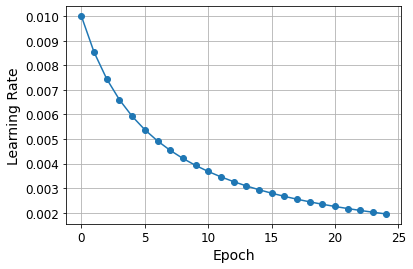

In [20]:
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate_ / (1 + decay_ * epochs * n_steps_per_epoch)

plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.plot(epochs, lrs,  "o-")
plt.grid(True)

plt.show()

**Exponential scheduling**

In [23]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

In [24]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [31]:
n_epochs = 25

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 14s 250us/sample - loss: 1.4784 - accuracy: 0.7035 - val_loss: 1.2069 - val_accuracy: 0.7328
Epoch 2/25
55000/55000 [==============================] - 13s 238us/sample - loss: 1.1297 - accuracy: 0.7542 - val_loss: 1.9001 - val_accuracy: 0.7764
Epoch 3/25
55000/55000 [==============================] - 12s 217us/sample - loss: 1.0237 - accuracy: 0.7773 - val_loss: 1.0849 - val_accuracy: 0.7308
Epoch 4/25
55000/55000 [==============================] - 13s 239us/sample - loss: 0.9149 - accuracy: 0.7940 - val_loss: 1.2414 - val_accuracy: 0.8156
Epoch 5/25
55000/55000 [==============================] - 12s 223us/sample - loss: 0.8952 - accuracy: 0.8077 - val_loss: 1.1373 - val_accuracy: 0.7942
Epoch 6/25
55000/55000 [==============================] - 13s 232us/sample - loss: 0.7724 - accuracy: 0.8241 - val_loss: 1.1432 - val_accuracy: 0.8304
Epoch 7/25
55000/55000 [=====================

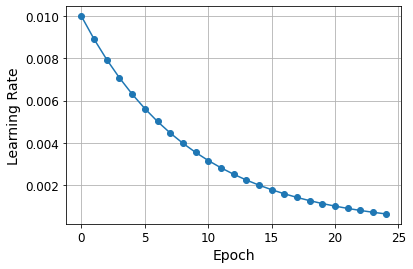

In [32]:
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.plot(history.epoch, history.history["lr"], "o-")
plt.grid(True)

plt.show()

Ниже представлен пример изменения learning_rate на каждом шаге, а не на каждой эпохе, как представлено выше

In [40]:
s = 25 * len(X_train) // 32 #кол-во итераций за 25 эпох
decay_ = 0.1
learning_rate_ = 0.01
exp_sch = keras.optimizers.schedules.ExponentialDecay(learning_rate_, s, decay_)
optimizer = keras.optimizers.SGD(exp_sch)

In [41]:
n_epochs = 25

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 10s 189us/sample - loss: 0.4849 - accuracy: 0.8297 - val_loss: 0.4003 - val_accuracy: 0.8620
Epoch 2/25
55000/55000 [==============================] - 10s 190us/sample - loss: 0.3775 - accuracy: 0.8665 - val_loss: 0.3772 - val_accuracy: 0.8708
Epoch 3/25
55000/55000 [==============================] - 10s 187us/sample - loss: 0.3452 - accuracy: 0.8776 - val_loss: 0.3705 - val_accuracy: 0.8676
Epoch 4/25
55000/55000 [==============================] - 10s 175us/sample - loss: 0.3231 - accuracy: 0.8846 - val_loss: 0.3535 - val_accuracy: 0.8766
Epoch 5/25
55000/55000 [==============================] - 9s 167us/sample - loss: 0.3069 - accuracy: 0.8898 - val_loss: 0.3452 - val_accuracy: 0.8798
Epoch 6/25
55000/55000 [==============================] - 10s 178us/sample - loss: 0.2938 - accuracy: 0.8940 - val_loss: 0.3415 - val_accuracy: 0.8814
Epoch 7/25
55000/55000 [======================

In [87]:
lr_history = np.ones((s,),dtype=np.float32)
for i in range(s):
    lr_history[i] = model.optimizer.learning_rate(i)

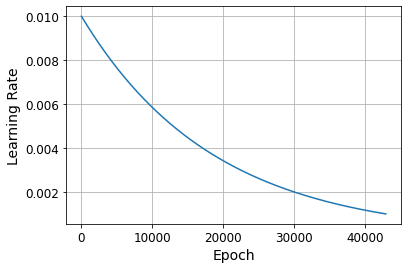

In [90]:
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.plot(range(s), lr_history)
plt.grid(True)

plt.show()

**Piecewise Constant Scheduling**

In [91]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [92]:
n_epochs = 25
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 16s 292us/sample - loss: 0.8403 - accuracy: 0.7575 - val_loss: 0.6237 - val_accuracy: 0.7946
Epoch 2/25
55000/55000 [==============================] - 15s 278us/sample - loss: 0.8701 - accuracy: 0.7514 - val_loss: 0.7352 - val_accuracy: 0.8078
Epoch 3/25
55000/55000 [==============================] - 15s 277us/sample - loss: 0.9382 - accuracy: 0.7277 - val_loss: 0.8386 - val_accuracy: 0.7364
Epoch 4/25
55000/55000 [==============================] - 15s 278us/sample - loss: 0.9242 - accuracy: 0.7240 - val_loss: 0.9622 - val_accuracy: 0.7088
Epoch 5/25
55000/55000 [==============================] - 15s 274us/sample - loss: 0.8952 - accuracy: 0.7154 - val_loss: 0.9735 - val_accuracy: 0.6742
Epoch 6/25
55000/55000 [==============================] - 16s 287us/sample - loss: 0.6113 - accuracy: 0.7890 - val_loss: 0.7032 - val_accuracy: 0.8164
Epoch 7/25
55000/55000 [=====================

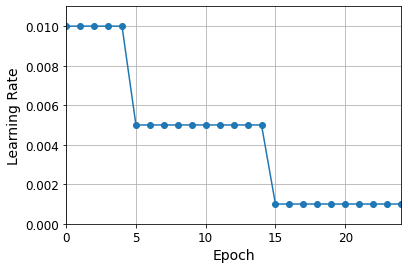

In [94]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()

**Performance Scheduling**

In [95]:
tf.random.set_seed(42)
np.random.seed(42)

In [96]:
n_epochs = 25
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 55000 samples, validate on 5000 samples
Epoch 1/25
55000/55000 [==============================] - 11s 192us/sample - loss: 0.5889 - accuracy: 0.8074 - val_loss: 0.4865 - val_accuracy: 0.8436
Epoch 2/25
55000/55000 [==============================] - 11s 195us/sample - loss: 0.5163 - accuracy: 0.8366 - val_loss: 0.4585 - val_accuracy: 0.8514
Epoch 3/25
55000/55000 [==============================] - 11s 203us/sample - loss: 0.5024 - accuracy: 0.8431 - val_loss: 0.5680 - val_accuracy: 0.8272
Epoch 4/25
55000/55000 [==============================] - 11s 203us/sample - loss: 0.5105 - accuracy: 0.8479 - val_loss: 0.6766 - val_accuracy: 0.8480
Epoch 5/25
55000/55000 [==============================] - 11s 195us/sample - loss: 0.5081 - accuracy: 0.8530 - val_loss: 0.5886 - val_accuracy: 0.8394
Epoch 6/25
55000/55000 [==============================] - 10s 186us/sample - loss: 0.5079 - accuracy: 0.8531 - val_loss: 0.7926 - val_accuracy: 0.8366
Epoch 7/25
55000/55000 [=====================

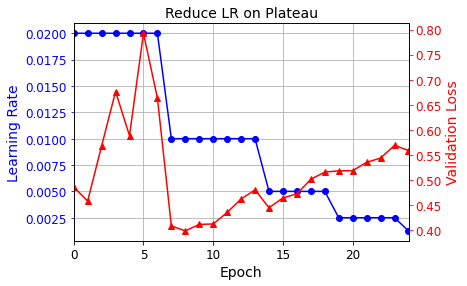

In [99]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

**Пример сбора данных о модели, изменяемых в процессе обучения.**

In [5]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [62]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [63]:
min_rate=10**-5
max_rate=1
epochs = 1
batch_size = 128

print('model optimizer curr learning_rate:', K.get_value(model.optimizer.lr))
K.set_value(model.optimizer.lr, min_rate)
print('model optimizer new learning_rate:', K.get_value(model.optimizer.lr))

init_weights = model.get_weights()

model optimizer curr learning_rate: 0.001
model optimizer new learning_rate: 1e-05


In [64]:
iterations = len(X_train) // batch_size * epochs
factor = np.exp(np.log(max_rate / min_rate) / iterations)
exp_lr = ExponentialLearningRate(factor)

In [65]:
history = model.fit(X_train_scaled, y_train, epochs=1, batch_size=batch_size, callbacks=[exp_lr])

Train on 55000 samples
55000/55000 [==============================] - 3s 63us/sample - loss: nan - accuracy: 0.4707 


Чтобы запустить обучение модели с нуля, выполнив возврат инициализированных перед началом обучения весов.

In [67]:
model.set_weights(init_weights)

In [109]:
nan_idx = 0

for i in range(len(exp_lr.losses)):
    if np.isnan(exp_lr.losses[i]):
        nan_idx = i
        break;

Выведем полученные графики

[1e-05, 10, 0.43285292, 1.586891531944275]

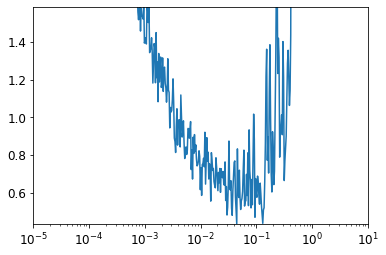

In [155]:
plt.plot(exp_lr.rates, exp_lr.losses)
plt.gca().set_xscale('log')
plt.axis([min_rate, 10, min(exp_lr.losses), 
          (exp_lr.losses[0] + min(exp_lr.losses)) / 2])

# Avoiding Overfitting Through Regularization

### $\ell_1$ and $\ell_2$ regularization

In [157]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [160]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax", 
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 239us/sample - loss: 1.6569 - accuracy: 0.8126 - val_loss: 0.7406 - val_accuracy: 0.8214
Epoch 2/2
55000/55000 [==============================] - 11s 206us/sample - loss: 0.7206 - accuracy: 0.8251 - val_loss: 0.6950 - val_accuracy: 0.8322


альтернатинвный вариант, чтобы не устанавливать для каждого скрытого слоя атрибут регуляризации

In [161]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 228us/sample - loss: 1.6229 - accuracy: 0.8126 - val_loss: 0.7354 - val_accuracy: 0.8216
Epoch 2/2
55000/55000 [==============================] - 12s 217us/sample - loss: 0.7175 - accuracy: 0.8262 - val_loss: 0.6917 - val_accuracy: 0.8370


### Dropout

In [169]:
tf.random.set_seed(42)
np.random.seed(42)
n_epochs = 2

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 13s 244us/sample - loss: 0.5686 - accuracy: 0.8031 - val_loss: 0.3809 - val_accuracy: 0.8606
Epoch 2/2
55000/55000 [==============================] - 12s 226us/sample - loss: 0.4212 - accuracy: 0.8467 - val_loss: 0.3387 - val_accuracy: 0.8752


### Alpha Dropout

In [7]:
tf.random.set_seed(42)
np.random.seed(42)
n_epochs = 20

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 10s 176us/sample - loss: 0.6615 - accuracy: 0.7616 - val_loss: 0.6664 - val_accuracy: 0.8254
Epoch 2/20
55000/55000 [==============================] - 9s 160us/sample - loss: 0.5526 - accuracy: 0.7967 - val_loss: 0.5846 - val_accuracy: 0.8380
Epoch 3/20
55000/55000 [==============================] - 9s 159us/sample - loss: 0.5261 - accuracy: 0.8060 - val_loss: 0.5287 - val_accuracy: 0.8544
Epoch 4/20
55000/55000 [==============================] - 9s 159us/sample - loss: 0.5077 - accuracy: 0.8106 - val_loss: 0.4915 - val_accuracy: 0.8594
Epoch 5/20
55000/55000 [==============================] - 9s 164us/sample - loss: 0.4934 - accuracy: 0.8177 - val_loss: 0.4901 - val_accuracy: 0.8588
Epoch 6/20
55000/55000 [==============================] - 9s 162us/sample - loss: 0.4833 - accuracy: 0.8203 - val_loss: 0.5142 - val_accuracy: 0.8550
Epoch 7/20
55000/55000 [==========================

In [8]:
model.evaluate(X_train_scaled, y_train)
model.evaluate(X_test_scaled, y_test)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.4656 - accuracy: 0.8688


[0.46556087351441383, 0.8688]

### MC Dropout

In [10]:
tf.random.set_seed(42)
np.random.seed(42)

In [11]:
x_test2 = X_test_scaled.astype('float32')

In [12]:
y_probas = np.stack([model(x_test2, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

**Сравним результаты** Monte-Carlo Dropout c обычным подходом предсказания принадлежности экземпляра к тому или иному классу

In [24]:
y_pred_test = model.predict(x_test2)
y_pred_test = np.round(y_pred_test, 2)
y_pred_test[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Модель полность уверена, что экземпляр 0 принадлежит к классу 9 "ankle boot". Посмотрим на результаты предсказания по методу  Monte-Carlo

In [40]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.13, 0.  , 0.8 ]],
      dtype=float32)

После использования метода MC Dropout модель уже так не уверена на счет принадлежности к классу 9 (уверенность 80%). Модель на 7% считае что это может быть сандаль и на 13% - кросовок (все классы принадлежащие к общему типу - обувь).

Посмотрим на отклонения

In [43]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.14, 0.  , 0.19]],
      dtype=float32)

Посмотрим на точность предсказаний, полученных с помощью MC Dropout

In [45]:
y_pred = np.argmax(y_proba, axis=1)
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8665

А теперь посмотрим на реальное изображение 1го экземпляра

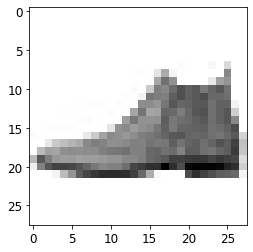

In [46]:
plt.imshow(X_test[0], cmap="binary")
plt.show()

**Применение метода MC Dropout, если используются специальные слои (например, BN)**

In [47]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

Выполним замену Dropout слоев, на наши кастомные Dropout слои. Все это делается, чтобы не включать режим обучения для модели целиком, что может быть в некоторых случая вредно, например, при  использовании BN слоев в процессе обучения.

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
alpha_dropout (AlphaDropout) (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
alpha_dropout_1 (AlphaDropou (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
alpha_dropout_2 (AlphaDropou (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [50]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

mc_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [51]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
mc_model.set_weights(model.get_weights())

In [52]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.14, 0.  , 0.8 ]],
      dtype=float32)

### Max-Norm Regularization

In [55]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [56]:
tf.random.set_seed(42)
np.random.seed(42)

In [59]:
n_epochs = 2
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

In [60]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, validation_data=(X_valid_scaled, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 21s 378us/sample - loss: 0.4735 - accuracy: 0.8349 - val_loss: 0.4011 - val_accuracy: 0.8624
Epoch 2/2
55000/55000 [==============================] - 19s 340us/sample - loss: 0.3570 - accuracy: 0.8685 - val_loss: 0.3474 - val_accuracy: 0.8744


# Tasks

### task 1

*Is it okay to initialize all the weights to the same value as long as that value is selected randomly using He initialization?*

Принцип инициализации заключается в том, чтобы добиться заданной дисперсии между весами при инициализации. Это делает нейроны и их связи максимально независимымми, предотвращая сваливания в локальный минимум нейронной модели в процессе обучения из-за наличия симметрии в ее структуре.

### task 2

*Is it okay to initialize the bias terms to 0?*

Не вижу проблем, чтобы инициализовать смещение нулем.

### task 3

*Name three advantages of the SELU activation function over ReLU.*

- нейрон может выводить занчение < 0, что облегчает проблему взрыва/исчезновения градентов;
- функция стоимости дифференциируема при значении вывода нейрона < 0, т.о. нейрон никогда не умирает (кроме того, функция SELU всюду гладкая);
- решение проблемы взрыва/исчезновения градиентов за счет того, что вывод слоя будет сохранять в процессе обучение среднее значение - 0 и отклонение - 1, полученное с предыдущего слоя;


- It can take on negative values, so the average output of the neurons in any given layer is typically closer to 0 than when using the ReLU activation function (which never outputs negative values). This helps alleviate the vanishing gradients problem;
- It always has a nonzero derivative, which avoids the dying units issue that can affect ReLU units;
- It is smooth everywhere, whereas the ReLU’s slope abruptly jumps from 0 to 1 at z = 0. Such an abrupt change can slow down Gradient Descent because it will bounce around z = 0.

### task 4

*In which cases would you want to use each of the following activation functions: SELU, leaky ReLU (and its variants), ReLU, tanh, logistic, and softmax?*

- ReLU хорошо себя показывает в большинстве случаев, но фукнции ELU и leaky ReLU ее превосходят. В случае, если производительность вычислений существенна, то стоит попробовать обычную ReLU, т.к. она быстрее вычисляется;
- Гиперболический тангентс (tanh) может быть полезен в выходном слое для вывода значений в диапазоне [-1, 1]; 
- Logistic может быть так же полезна в выходном слое, если нужно оценить вероятность принадлежности к классу. 
- Softmax так же полезна в выходном слое, когда нужно оценить вероятность принадлежности к взаимноисключающим классам. 

### task 5

*What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999) when using an SGD optimizer?*

При большом значении момента, тогда алгоритм наберет быстро большое ускорение. При достижении минимума - алгоритм его перескочит и через некоторое время наберет опять же большое ускорение но в противоположную сторону. Алгоритм будет долго прыгать мимо минимума постепенно замедляясь. Т.о. с меньшим моментом алгоритм быстрее бы сошелся 

### task 6

*Name three ways you can produce a sparse model.*

- Обучить модель обычным способом и занулить маленькие веса; 
- Использовать l1 регуляризацию для весовых коэффициентов; 
- Использовать FTRL optimizer. 

### task 7

*Does dropout slow down training? Does it slow down inference (i.e., making predictions on new instances)? What are about MC dropout?*

Dropout напротив ускоряет обучение на каждой итерации, т.к. модель разряженная, однако кол-ва итераций может потребоваться больше для схождения. Предсказание обученной модели стандартное, т.к. dropout используется только для обучения. MC Dropout - это технология, которая накладыает ограничение на предсказание, которая используя обученную с помощью dropout модель формирует из нее ансамбль из n разряженных моделей и делает предсказание на основе заключения ансамбля. Поэтому производительность предсказания MSDropout зависит от кол-ва моделей в ансамбле и должно быть существенно медленее обычной модели.

### task 8

*a) Build a DNN with five hidden layers of 100 neurons each, He initialization, and the ELU activation function*

In [3]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    #keras.layers.BatchNormalization(), #для нормализации входных сигналов
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(5, activation="softmax")
])

*b. Using Adam optimization and early stopping, try training it on MNIST but only on digits 0 to 4, as we will use transfer learning for digits 5 to 9 in the next exercise. You will need a softmax output layer with five neurons, and as always make sure to save checkpoints at regular intervals and save the final model so you can reuse it later.*

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

data normalization

In [7]:
pixel_means = x_train.mean(axis=0, keepdims=True)
#pixel_stds = x_train.std(axis=0, keepdims=True)

x_train_scaled = (x_train - pixel_means) #/ pixel_stds
x_valid_scaled = (x_valid - pixel_means) #/ pixel_stds
x_test_scaled  = (x_test  - pixel_means) #/ pixel_stds

split dataset into 2 parts (numbers [0...4] and [5...9])

In [8]:
def split_mnist(x, y):
    flags1 = (y == 0) | (y == 1) | (y == 2) | (y == 3) | (y == 4)
    flags2 = ~flags1
    return x[flags1], x[flags2], y[flags1], y[flags2]

x_train1, x_train2, y_train1, y_train2 = split_mnist(x_train, y_train)
x_valid1, x_valid2, y_valid1, y_valid2 = split_mnist(x_valid, y_valid)
x_test1,  x_test2,  y_test1,  y_test2  = split_mnist(x_test,  y_test)

In [10]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_1_4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"])
history = model.fit(x_train1, y_train1, epochs=450, 
                   validation_data=(x_valid1, y_valid1),
                   callbacks=[checkpoint_cb, early_stopping_cb])
model_loaded = keras.models.load_model('ch11_mnist_1_4.h5')

Train on 28038 samples, validate on 2558 samples
Epoch 1/450
28038/28038 [==============================] - 5s 186us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1026 - val_accuracy: 0.9934
Epoch 2/450
28038/28038 [==============================] - 4s 157us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9934
Epoch 3/450
28038/28038 [==============================] - 4s 149us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1035 - val_accuracy: 0.9934
Epoch 4/450
28038/28038 [==============================] - 4s 127us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1039 - val_accuracy: 0.9934
Epoch 5/450
28038/28038 [==============================] - 3s 121us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1043 - val_accuracy: 0.9934
Epoch 6/450
28038/28038 [==============================] - 4s 128us/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1047 - val_accuracy: 0.9934
Epoch 7/450
28038/280

In [15]:
model_loaded.evaluate(x_train1, y_train1),
model_loaded.evaluate(x_valid1, y_valid1)

5139/5139 [==============================] - 0s 76us/sample - loss: 0.1139 - accuracy: 0.9946


[0.11392050442058178, 0.9945515]

Похожего результата можно было бы добиться без предварительной нормализации данных вручную, а добавлением слоя BN после входного слоя. Если нормализацию данных не делать, то получим точность на validation наборе за 450 эпох порядка 50 ... 65%. Кроме того, имеется небольшое переобучение.

*c. Tune the hyperparameters using cross-validation and see what precision you can achieve.*

In [19]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
def model_builder(n_hidden=5, n_neurons=100, kernel_initializer="he_normal",
                  adam_learning_rate=0.001, batch_size=32, activation="elu",
                  input_shape=[28, 28], output_neurons=5):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, kernel_initializer=kernel_initializer, activation=activation))
    model.add(keras.layers.Dense(output_neurons, activation="softmax"))
    optimizer = keras.optimizers.Adam(lr=adam_learning_rate, beta_1=0.9, beta_2=0.999)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [21]:
keras_wrapper = keras.wrappers.scikit_learn.KerasClassifier(model_builder)

In [146]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': np.arange(3, 10),
    'n_neurons': np.arange(50, 250),
    'kernel_initializer': ["he_normal", "GlorotNormal", "lecun_normal"],
    'adam_learning_rate': reciprocal(5e-5, 1e-2)
}

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

rnd_search_cv = RandomizedSearchCV(keras_wrapper, param_distribs, n_iter=200, cv=3, n_jobs=6)
rnd_search_cv.fit(x_train1[:15000], y_train1[:15000], epochs=20, callbacks=[early_stopping_cb],
                  validation_data=(x_valid1, y_valid1))

Train on 15000 samples, validate on 2558 samples
Epoch 1/20
15000/15000 [==============================] - 4s 267us/sample - loss: 0.1396 - accuracy: 0.9554 - val_loss: 0.0661 - val_accuracy: 0.9746
Epoch 2/20
15000/15000 [==============================] - 4s 258us/sample - loss: 0.0606 - accuracy: 0.9801 - val_loss: 0.0488 - val_accuracy: 0.9840
Epoch 3/20
15000/15000 [==============================] - 3s 185us/sample - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0577 - val_accuracy: 0.9824
Epoch 4/20
15000/15000 [==============================] - 3s 206us/sample - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0590 - val_accuracy: 0.9840
Epoch 5/20
15000/15000 [==============================] - 3s 208us/sample - loss: 0.0343 - accuracy: 0.9903 - val_loss: 0.0339 - val_accuracy: 0.9879
Epoch 6/20
15000/15000 [==============================] - 3s 212us/sample - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0479 - val_accuracy: 0.9855
Epoch 7/20
15000/15000 [===========================

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa2e7928828>,
                   iid='warn', n_iter=200, n_jobs=6,
                   param_distributions={'adam_learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa28416e0f0>,
                                        'kernel_initializer': ['he_normal',
                                                               'GlorotNormal',
                                                               'lecun_n...
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
       232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249])},
           

Вынужденно установил sklearn 0.21.2 (до этого была установлена 0.22.2.post1), т.к. не работал RandomizedSerchCV с оберткой KerasClassifier.

In [176]:
rnd_search_cv.best_params_

{'adam_learning_rate': 0.0006800097597834962,
 'kernel_initializer': 'he_normal',
 'n_hidden': 4,
 'n_neurons': 175}

In [177]:
best_model = model_builder(n_hidden=rnd_search_cv.best_params_['n_hidden'],
                           n_neurons=rnd_search_cv.best_params_['n_neurons'],
                           adam_learning_rate=rnd_search_cv.best_params_['adam_learning_rate'],
                           kernel_initializer=rnd_search_cv.best_params_['kernel_initializer'])

tensorboard = keras.callbacks.TensorBoard(get_run_logdir("_best_model"))
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_1_4_best2.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
history = best_model.fit(x_train1, y_train1, epochs=450, 
                   validation_data=(x_valid1, y_valid1),
                   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard])
best_model_loaded = keras.models.load_model('ch11_mnist_1_4_best2.h5')

Train on 28038 samples, validate on 2558 samples
Epoch 1/450
28038/28038 [==============================] - 6s 209us/sample - loss: 0.1050 - accuracy: 0.9669 - val_loss: 0.0558 - val_accuracy: 0.9805
Epoch 2/450
28038/28038 [==============================] - 5s 178us/sample - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0650 - val_accuracy: 0.9785
Epoch 3/450
28038/28038 [==============================] - 5s 189us/sample - loss: 0.0346 - accuracy: 0.9890 - val_loss: 0.0589 - val_accuracy: 0.9824
Epoch 4/450
28038/28038 [==============================] - 5s 174us/sample - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0409 - val_accuracy: 0.9879
Epoch 5/450
28038/28038 [==============================] - 5s 170us/sample - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0406 - val_accuracy: 0.9879
Epoch 6/450
28038/28038 [==============================] - 5s 190us/sample - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0391 - val_accuracy: 0.9894
Epoch 7/450
28038/28038 [====================

In [178]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 175)               137375    
_________________________________________________________________
dense_6 (Dense)              (None, 175)               30800     
_________________________________________________________________
dense_7 (Dense)              (None, 175)               30800     
_________________________________________________________________
dense_8 (Dense)              (None, 175)               30800     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 880       
Total params: 230,655
Trainable params: 230,655
Non-trainable params: 0
________________________________________________

In [179]:
best_model_loaded.evaluate(x_train1, y_train1),
best_model_loaded.evaluate(x_valid1, y_valid1)

2558/2558 [==============================] - 0s 75us/sample - loss: 0.0229 - accuracy: 0.9961


[0.02286479673161387, 0.9960907]

In [158]:
model_loaded = keras.models.load_model('ch11_mnist_1_4.h5')
model_loaded.evaluate(x_train1, y_train1),
model_loaded.evaluate(x_valid1, y_valid1)

2558/2558 [==============================] - 0s 81us/sample - loss: 0.1026 - accuracy: 0.9934


[0.10263623228715642, 0.9933542]

Немного удалось точность увеличить и снизить ошибку на обучающем наборе

*d. Now try adding Batch Normalization and compare the learning curves: is it converging faster than before? Does it produce a better model?*

In [160]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_8d = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5, activation="softmax")
])

optimizer = keras.optimizers.Adam(lr=0.00068)
model_8d.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [175]:
tensorboard = keras.callbacks.TensorBoard(get_run_logdir("_model_8d"))
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_model_8d.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
history = model_8d.fit(x_train1, y_train1, epochs=450,
                       validation_data=(x_valid1, y_valid1),
                       callbacks=[checkpoint_cb, early_stopping_cb, tensorboard])
model_8d_loaded = keras.models.load_model('ch11_mnist_model_8d.h5')

Train on 28038 samples, validate on 2558 samples
Epoch 1/450
28038/28038 [==============================] - 10s 346us/sample - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0308 - val_accuracy: 0.9934
Epoch 2/450
28038/28038 [==============================] - 8s 294us/sample - loss: 0.0034 - accuracy: 0.9988 - val_loss: 0.0375 - val_accuracy: 0.9945
Epoch 3/450
28038/28038 [==============================] - 8s 280us/sample - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0404 - val_accuracy: 0.9941
Epoch 4/450
28038/28038 [==============================] - 9s 330us/sample - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0358 - val_accuracy: 0.9937
Epoch 5/450
28038/28038 [==============================] - 9s 335us/sample - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.0365 - val_accuracy: 0.9937
Epoch 6/450
28038/28038 [==============================] - 8s 295us/sample - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0402 - val_accuracy: 0.9937
Epoch 7/450
28038/28038 [===================

In [163]:
model_8d_loaded.evaluate(x_train1, y_train1),
model_8d_loaded.evaluate(x_valid1, y_valid1)

2558/2558 [==============================] - 0s 94us/sample - loss: 0.0273 - accuracy: 0.9941


[0.02727437604251796, 0.99413604]

Следует отметить, что поиск параметров методом кросс валидации осуществлялся на прототипе модели без использования BN. BN показывает себя лучше на DNN (с большим кол-вом слоев). Кроме того, следует отметить, что входные данных подверглись предварительной нормализации. Если бы это не было сделано, то BN очевидно привел бы к существенно более быстрому схождению (модель без BN и без предварительной нормализации очень бы медленно сходилась ). Learning curves показывают что BN модель сходится быстрее, но к лучшей модели это не привело, т.к. (повторюсь) слишком мало слоев.



*e. Is the model overfitting the training set? Try adding dropout to every layer and try again. Does it help?*

In [180]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model_8e = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(175, kernel_initializer="he_normal", activation="elu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(5, activation="softmax")
])

optimizer = keras.optimizers.Adam(lr=0.00068)
model_8e.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(get_run_logdir("_model_8e"))
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_model_8e.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model_8e.fit(x_train1, y_train1, epochs=450,
                       validation_data=(x_valid1, y_valid1),
                       callbacks=[checkpoint_cb, early_stopping_cb, tensorboard])
model_8e_loaded = keras.models.load_model('ch11_mnist_model_8e.h5')

model_8e_loaded.evaluate(x_train1, y_train1),
model_8e_loaded.evaluate(x_valid1, y_valid1)

Train on 28038 samples, validate on 2558 samples
Epoch 1/450
28038/28038 [==============================] - 13s 453us/sample - loss: 0.2247 - accuracy: 0.9277 - val_loss: 0.0651 - val_accuracy: 0.9801
Epoch 2/450
28038/28038 [==============================] - 10s 345us/sample - loss: 0.1166 - accuracy: 0.9639 - val_loss: 0.0501 - val_accuracy: 0.9848
Epoch 3/450
28038/28038 [==============================] - 11s 390us/sample - loss: 0.0956 - accuracy: 0.9703 - val_loss: 0.0462 - val_accuracy: 0.9840
Epoch 4/450
28038/28038 [==============================] - 10s 356us/sample - loss: 0.0801 - accuracy: 0.9750 - val_loss: 0.0380 - val_accuracy: 0.9875
Epoch 5/450
28038/28038 [==============================] - 10s 352us/sample - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0367 - val_accuracy: 0.9871
Epoch 6/450
28038/28038 [==============================] - 11s 378us/sample - loss: 0.0655 - accuracy: 0.9794 - val_loss: 0.0392 - val_accuracy: 0.9875
Epoch 7/450
28038/28038 [==============

[0.015223896747856947, 0.9953088]

Особой проблемы с переобучением не наблюдалось и в best_model и в model_8d (ошибка порядка 0.02 в отличие от ошибки на обучающем наборе близкой к 0). Однако dropout дополнительно сократил переобучение, снизив ошибку на наборе валидации и увеличив на обучающем (теперь он мой фаворит) и повысил результатативность модели model_8d с BN слоями.


Можно попробовать использовать кросс-валидацию для поиска оптимальных параметров модели с BN и dropout, но что-то лень.


### taks 9. Transfer learning.
*a. Create a new DNN that reuses all the pretrained hidden layers of the previous model, freezes them, and replaces the softmax output layer with a new one.*

In [191]:
model_8e_loaded = keras.models.load_model('ch11_mnist_model_8e.h5')
model_9a = keras.models.Sequential(model_8e_loaded.layers[:-1])

In [192]:
for l in model_9a.layers[:-1]: 
    l.trainable = False

In [193]:
model_9a.add(keras.layers.Dense(5, activation="sigmoid"))

Клонировать модель смысл нет, поскольку модель model_8e сохранена в файле.

*Prepare train dataset for task 9.b*

In [224]:
def pick_part(x, y, picked_num, size=100):
    idx = y == picked_num
    x_ = x[idx]
    x_ = x_[:size]
    return x_

x_train2_5 = pick_part(x_train2, y_train2, 5)
x_train2_6 = pick_part(x_train2, y_train2, 6)
x_train2_7 = pick_part(x_train2, y_train2, 7)
x_train2_8 = pick_part(x_train2, y_train2, 8)
x_train2_9 = pick_part(x_train2, y_train2, 9)

In [11]:
def print_imgs(x, n_rows = 10, n_cols = 10, labels=[], img_xsize=10, img_ysize=5):
    plt.figure(figsize=(img_xsize, img_ysize))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            if len(labels) != 0:
                plt.title(labels[index])

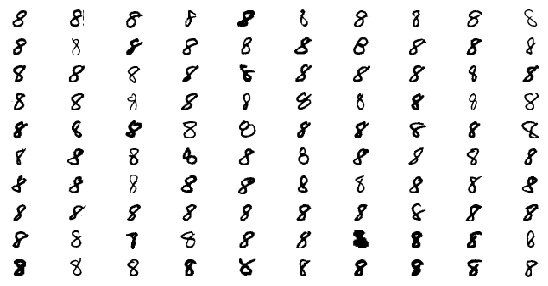

In [297]:
print_imgs(x_train2_8)

In [282]:
x_train2_new = np.r_[x_train2_5, x_train2_6, x_train2_7, x_train2_8, x_train2_9]
y_train2_new = np.ones(len(x_train2_new), dtype=np.int8)
y_train2_new[0:]    = 5
y_train2_new[100:]  = 6
y_train2_new[200:]  = 7
y_train2_new[300:]  = 8
y_train2_new[400:]  = 9

perform permutation

In [299]:
idx = np.random.permutation(500)
x_train2_new = x_train2_new[idx]
y_train2_new = y_train2_new[idx]

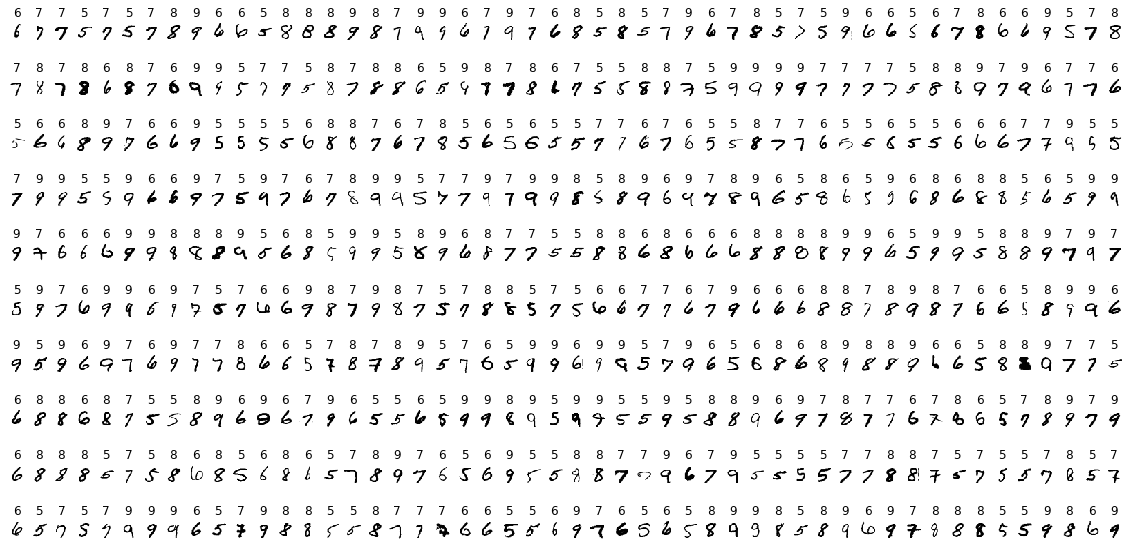

In [300]:
print_imgs(x_train2_new, 10, 50, labels=y_train2_new, img_xsize=20, img_ysize=10)

In [312]:
y_train2_new = y_train2_new - 5
y_valid2_new = y_valid2 - 5
y_test2_new = y_test2 - 5

*b. Train this new DNN on digits 5 to 9, using only 100 images per digit, and time how long it takes. Despite this small number of examples, can you achieve high precision?*

In [313]:
optimizer = keras.optimizers.Adam(lr=0.00068)
model_9a.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(get_run_logdir("_model_9a"))
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_model_9a.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model_9a.fit(x_train2_new, y_train2_new, epochs=450,
                       validation_data=(x_valid2, y_valid2_new),
                       callbacks=[checkpoint_cb, early_stopping_cb, tensorboard])

Train on 500 samples, validate on 2442 samples
Epoch 1/450
500/500 [==============================] - 2s 4ms/sample - loss: 1.7914 - accuracy: 0.1880 - val_loss: 1.6208 - val_accuracy: 0.1929
Epoch 2/450
500/500 [==============================] - 1s 1ms/sample - loss: 1.6158 - accuracy: 0.2600 - val_loss: 1.5211 - val_accuracy: 0.2961
Epoch 3/450
500/500 [==============================] - 1s 1ms/sample - loss: 1.4649 - accuracy: 0.3360 - val_loss: 1.4553 - val_accuracy: 0.3722
Epoch 4/450
500/500 [==============================] - 0s 967us/sample - loss: 1.4080 - accuracy: 0.3900 - val_loss: 1.4114 - val_accuracy: 0.4156
Epoch 5/450
500/500 [==============================] - 1s 1ms/sample - loss: 1.3409 - accuracy: 0.4500 - val_loss: 1.3768 - val_accuracy: 0.4472
Epoch 6/450
500/500 [==============================] - 1s 1ms/sample - loss: 1.2955 - accuracy: 0.5100 - val_loss: 1.3445 - val_accuracy: 0.4676
Epoch 7/450
500/500 [==============================] - 1s 1ms/sample - loss: 1.24

Epoch 112/450
500/500 [==============================] - 0s 935us/sample - loss: 0.8367 - accuracy: 0.7120 - val_loss: 0.9044 - val_accuracy: 0.7170
Epoch 113/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.7501 - accuracy: 0.7360 - val_loss: 0.9048 - val_accuracy: 0.7195
Epoch 114/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.7738 - accuracy: 0.7220 - val_loss: 0.9016 - val_accuracy: 0.7179
Epoch 115/450
500/500 [==============================] - 0s 895us/sample - loss: 0.8307 - accuracy: 0.7100 - val_loss: 0.8970 - val_accuracy: 0.7183
Epoch 116/450
500/500 [==============================] - 0s 898us/sample - loss: 0.7782 - accuracy: 0.7440 - val_loss: 0.8932 - val_accuracy: 0.7187
Epoch 117/450
500/500 [==============================] - 0s 942us/sample - loss: 0.8239 - accuracy: 0.7200 - val_loss: 0.8966 - val_accuracy: 0.7162
Epoch 118/450
500/500 [==============================] - 0s 826us/sample - loss: 0.7835 - accuracy: 0.7300 - v

In [318]:
model_9a_loaded = keras.models.load_model('ch11_mnist_model_9a.h5')
model_9a_loaded.evaluate(x_train2_new, y_train2_new),
model_9a_loaded.evaluate(x_valid2, y_valid2_new)

2442/2442 [==============================] - 1s 228us/sample - loss: 0.8904 - accuracy: 0.7187


[0.890367075080856, 0.7186732]

точность модели порядка 72% для обучающего набора из 500 данных достаточно не плохая я думаю. время обучения конечно существенно быстрее чем при обучении с нуля на полном обучающем наборе (см. лог выше)

*c. Try caching the frozen layers, and train the model again: how much faster is it now?*

Смысл в том, чтобы подсчитать для каждого экземпляра обучаюещего набора вывод вплоть до последнего замороженного слоя т.к. он не меняется в процессе обучения и использовать эти значения для определения весов последнего слоя без необходимости каждый раз вычислять проход сигнала по всем скрытым слоям. Полагаю это можно сделать только работая из под tf, а не в keras или полностью в ручном режиме. Не хочется.


*d. Try again reusing just four hidden layers instead of five. Can you achieve a higher precision?*

In [351]:
model_9d = keras.models.load_model('ch11_mnist_model_9a.h5')
for l in model_9d.layers:
    if isinstance(l, tf.keras.layers.Dense):
        print(l.name, l.trainable)

dense False
dense_1 False
dense_2 False
dense_3 False
dense_7 True


In [352]:
model_9d.get_layer('dense_3').trainable = True
for l in model_9d.layers:
    if isinstance(l, tf.keras.layers.Dense):
        print(l.name, l.trainable)

dense False
dense_1 False
dense_2 False
dense_3 True
dense_7 True


In [356]:
optimizer = keras.optimizers.Adam(lr=0.00068)
model_9d.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(get_run_logdir("_model_9d"))
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_model_9d.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model_9d.fit(x_train2_new, y_train2_new, epochs=450,
                       validation_data=(x_valid2, y_valid2_new),
                       callbacks=[checkpoint_cb, early_stopping_cb, tensorboard])

Train on 500 samples, validate on 2442 samples
Epoch 1/450
500/500 [==============================] - 3s 5ms/sample - loss: 0.3428 - accuracy: 0.8940 - val_loss: 0.5803 - val_accuracy: 0.8133
Epoch 2/450
500/500 [==============================] - 0s 880us/sample - loss: 0.3510 - accuracy: 0.8820 - val_loss: 0.5929 - val_accuracy: 0.8071
Epoch 3/450
500/500 [==============================] - 0s 909us/sample - loss: 0.3786 - accuracy: 0.8720 - val_loss: 0.6021 - val_accuracy: 0.8047
Epoch 4/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.3629 - accuracy: 0.8860 - val_loss: 0.6052 - val_accuracy: 0.8002
Epoch 5/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.3655 - accuracy: 0.8720 - val_loss: 0.6115 - val_accuracy: 0.7998
Epoch 6/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.3561 - accuracy: 0.8720 - val_loss: 0.6086 - val_accuracy: 0.7989
Epoch 7/450
500/500 [==============================] - 0s 977us/sample - loss: 

In [358]:
model_9d_loaded = keras.models.load_model('ch11_mnist_model_9d.h5')
model_9d_loaded.evaluate(x_train2_new, y_train2_new),
model_9d_loaded.evaluate(x_valid2, y_valid2_new)

2442/2442 [==============================] - 1s 259us/sample - loss: 0.5803 - accuracy: 0.8133


[0.5803407753568317, 0.8132678]

it's better, but still not grate. 

*e. Now unfreeze the top two hidden layers and continue training: can you get the model to perform even better?*

In [360]:
model_9e = keras.models.load_model('ch11_mnist_model_9d.h5')
model_9e.get_layer('dense_2').trainable = True
for l in model_9e.layers:
    if isinstance(l, tf.keras.layers.Dense):
        print(l.name, l.trainable)

dense False
dense_1 False
dense_2 True
dense_3 True
dense_7 True


In [361]:
optimizer = keras.optimizers.Adam(lr=0.00068)
model_9e.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(get_run_logdir("_model_9e"))
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_model_9e.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model_9e.fit(x_train2_new, y_train2_new, epochs=450,
                       validation_data=(x_valid2, y_valid2_new),
                       callbacks=[checkpoint_cb, early_stopping_cb, tensorboard])

Train on 500 samples, validate on 2442 samples
Epoch 1/450
500/500 [==============================] - 2s 4ms/sample - loss: 0.3143 - accuracy: 0.9060 - val_loss: 0.5840 - val_accuracy: 0.8124
Epoch 2/450
500/500 [==============================] - 0s 919us/sample - loss: 0.3445 - accuracy: 0.8820 - val_loss: 0.5930 - val_accuracy: 0.8079
Epoch 3/450
500/500 [==============================] - 0s 844us/sample - loss: 0.3770 - accuracy: 0.8660 - val_loss: 0.5922 - val_accuracy: 0.8108
Epoch 4/450
500/500 [==============================] - 0s 826us/sample - loss: 0.3463 - accuracy: 0.8920 - val_loss: 0.5853 - val_accuracy: 0.8104
Epoch 5/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.3515 - accuracy: 0.8800 - val_loss: 0.5879 - val_accuracy: 0.8055
Epoch 6/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.3393 - accuracy: 0.8820 - val_loss: 0.5788 - val_accuracy: 0.8124
Epoch 7/450
500/500 [==============================] - 0s 888us/sample - loss

500/500 [==============================] - 1s 1ms/sample - loss: 0.2137 - accuracy: 0.9460 - val_loss: 0.4389 - val_accuracy: 0.8714
Epoch 112/450
500/500 [==============================] - 0s 865us/sample - loss: 0.2221 - accuracy: 0.9260 - val_loss: 0.4331 - val_accuracy: 0.8763
Epoch 113/450
500/500 [==============================] - 0s 904us/sample - loss: 0.1994 - accuracy: 0.9320 - val_loss: 0.4344 - val_accuracy: 0.8771
Epoch 114/450
500/500 [==============================] - 0s 927us/sample - loss: 0.1833 - accuracy: 0.9460 - val_loss: 0.4344 - val_accuracy: 0.8755
Epoch 115/450
500/500 [==============================] - 0s 926us/sample - loss: 0.2279 - accuracy: 0.9300 - val_loss: 0.4311 - val_accuracy: 0.8755
Epoch 116/450
500/500 [==============================] - 0s 812us/sample - loss: 0.1821 - accuracy: 0.9400 - val_loss: 0.4336 - val_accuracy: 0.8780
Epoch 117/450
500/500 [==============================] - 0s 837us/sample - loss: 0.2596 - accuracy: 0.9000 - val_loss: 0.4

500/500 [==============================] - 0s 933us/sample - loss: 0.1207 - accuracy: 0.9580 - val_loss: 0.4408 - val_accuracy: 0.8915
Epoch 222/450
500/500 [==============================] - 0s 921us/sample - loss: 0.1381 - accuracy: 0.9520 - val_loss: 0.4411 - val_accuracy: 0.8903
Epoch 223/450
500/500 [==============================] - 0s 942us/sample - loss: 0.1510 - accuracy: 0.9500 - val_loss: 0.4442 - val_accuracy: 0.8927
Epoch 224/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.1344 - accuracy: 0.9700 - val_loss: 0.4403 - val_accuracy: 0.8923
Epoch 225/450
500/500 [==============================] - 0s 985us/sample - loss: 0.1383 - accuracy: 0.9500 - val_loss: 0.4357 - val_accuracy: 0.8878
Epoch 226/450
500/500 [==============================] - 0s 903us/sample - loss: 0.1652 - accuracy: 0.9440 - val_loss: 0.4256 - val_accuracy: 0.8923
Epoch 227/450
500/500 [==============================] - 0s 895us/sample - loss: 0.1860 - accuracy: 0.9380 - val_loss: 0.4

In [363]:
model_9e_loaded = keras.models.load_model('ch11_mnist_model_9e.h5')
model_9e_loaded.evaluate(x_train2_new, y_train2_new),
model_9e_loaded.evaluate(x_valid2, y_valid2_new)

2442/2442 [==============================] - 1s 262us/sample - loss: 0.4089 - accuracy: 0.8964


[0.4089006201885061, 0.8963964]

Неплохо. Теперь разморозим все слои

In [365]:
model_9e2 = keras.models.load_model('ch11_mnist_model_9e.h5')
for l in model_9e2.layers: 
    l.trainable=True
    print(l.name, l.trainable)

flatten True
batch_normalization True
dropout True
dense True
batch_normalization_1 True
dropout_1 True
dense_1 True
batch_normalization_2 True
dropout_2 True
dense_2 True
batch_normalization_3 True
dropout_3 True
dense_3 True
batch_normalization_4 True
dropout_4 True
dense_7 True


In [366]:
optimizer = keras.optimizers.Adam(lr=0.00068)
model_9e2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(get_run_logdir("model_9e2"))
checkpoint_cb = keras.callbacks.ModelCheckpoint("ch11_mnist_model_9e2.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model_9e2.fit(x_train2_new, y_train2_new, epochs=450,
                       validation_data=(x_valid2, y_valid2_new),
                       callbacks=[checkpoint_cb, early_stopping_cb, tensorboard])

model_9e2_loaded = keras.models.load_model('ch11_mnist_model_9e2.h5')
model_9e2_loaded.evaluate(x_train2_new, y_train2_new),
model_9e2_loaded.evaluate(x_valid2, y_valid2_new)

Train on 500 samples, validate on 2442 samples
Epoch 1/450
500/500 [==============================] - 3s 5ms/sample - loss: 0.1921 - accuracy: 0.9380 - val_loss: 0.3450 - val_accuracy: 0.9132
Epoch 2/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.1322 - accuracy: 0.9540 - val_loss: 0.2808 - val_accuracy: 0.9247
Epoch 3/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.1610 - accuracy: 0.9460 - val_loss: 0.2403 - val_accuracy: 0.9312
Epoch 4/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.1084 - accuracy: 0.9700 - val_loss: 0.2219 - val_accuracy: 0.9320
Epoch 5/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.1007 - accuracy: 0.9740 - val_loss: 0.2153 - val_accuracy: 0.9316
Epoch 6/450
500/500 [==============================] - 1s 2ms/sample - loss: 0.1175 - accuracy: 0.9700 - val_loss: 0.2064 - val_accuracy: 0.9353
Epoch 7/450
500/500 [==============================] - 1s 1ms/sample - loss: 0.0916

Epoch 57/450
500/500 [==============================] - 0s 902us/sample - loss: 0.0541 - accuracy: 0.9800 - val_loss: 0.2362 - val_accuracy: 0.9386
Epoch 58/450
500/500 [==============================] - 0s 948us/sample - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.2355 - val_accuracy: 0.9398
Epoch 59/450
2442/2442 [==============================] - 1s 210us/sample - loss: 0.1935 - accuracy: 0.9394


[0.193495776086289, 0.93939394]

In [367]:
model_9e2_loaded.evaluate(x_test2, y_test2_new)

4861/4861 [==============================] - 1s 127us/sample - loss: 0.1858 - accuracy: 0.9408


[0.1858406301049067, 0.9407529]

nice!

### task 10 Pretraining on an auxiliary task.

*a. In this exercise you will build a DNN that compares two MNIST digit images and predicts whether they represent the same digit or not. Then you will reuse the lower layers of this network to train an MNIST classifier using very little training data. Start by building two DNNs (let’s call them DNN A and B), both similar to the one you built earlier but without the output layer: each DNN should have five hidden layers of 100 neurons each, He initialization, and ELU activation. Next, add one more hidden layer with 10 units on top of both DNNs. To do this, you should use a keras.layers.Concatenate layer to concatenate the outputs of both DNNs for each instance, then feed the result to the hidden layer. Finally, add an output layer with a single neuron using the logistic activation function.*

In [57]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model():
    model_in = keras.layers.Input(shape=[28*28])
    h1 = keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu")(model_in)
    h2 = keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu")(h1)
    h3 = keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu")(h2)
    h4 = keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu")(h3)
    h5 = keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu")(h4)
    model = keras.models.Model(model_in, h5)
    return model, model_in, h5
    
dnnA, dnnA_in, dnnA_out = build_model()
dnnB, dnnB_in, dnnB_out = build_model()

merged = tf.keras.layers.concatenate([dnnA_out, dnnB_out])
hidden = keras.layers.Dense(10, kernel_initializer="he_normal", activation="elu")(merged)
output = keras.layers.Dense(1, activation="sigmoid")(hidden)
dnn = keras.models.Model([dnnA_in, dnnB_in], output)
dnn.compile(loss="mse", optimizer="sgd", metrics=["accuracy"]) #sparse_categorical_crossentropy


*b. Split the MNIST training set in two sets: split #1 should containing 55,000 images, and split #2 should contain contain 5,000 images. Create a function that generates a training batch where each instance is a pair of MNIST images picked from split #1. Half of the training instances should be pairs of images that belong to the same class, while the other half should be images from different classes. For each pair, the training label should be 0 if the images are from the same class, or 1 if they are from different classes.*

In [18]:
def get_number_img(x, y, target, start_i=0):
    for i in range(start_i, len(x)):
        if y[i] == target:
            return x[i]
    for i in range(0, start_i):
        if y[i] == target:
            return x[i]
    return None

def picker_random_numb(n):
    while(True):
        res = np.random.randint(0, 10)
        if (res != n):
            return res
    
def prepare_set(x, y):
    y_pairs = np.ones(len(y), dtype=np.uint8)
    x1 = np.zeros((x.shape))
    x2 = np.zeros((x.shape))
    for i in range(len(x)):
        x1[i] = x[i]
        dig   = y[i]
        if np.random.rand() >= 0.5: #put the same number into x1 and x2
            y_pairs[i] = 0
            x2[i] =  get_number_img(x, y, dig, i+1)
        else:
            another_dig = picker_random_numb(dig)
            x2[i] = get_number_img(x, y, another_dig, i+1)
    return x1, x2, y_pairs

In [20]:
x1_train10_1, x1_train10_2, y1_train10 = prepare_set(x_train, y_train)
x2_train10_1, x2_train10_2, y2_train10 = prepare_set(x_valid, y_valid)
x_test10_1,   x_test10_2,   y_test10   = prepare_set(x_test,  y_test)

print some pairs

- 1 - mean that the pair of numbers isn't the same
- 0 - mean that is the same numbers

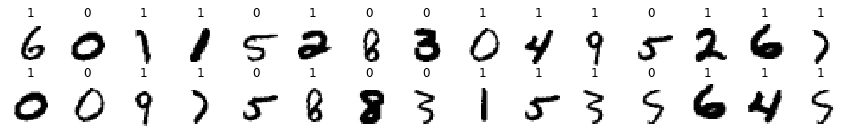

In [21]:
start = 1000

x1_print_set = x1_train10_1[start:start+15]
x2_print_set = x1_train10_2[start:start+15]
y_print_set  = y1_train10[start:start+15]

x_print_set = np.r_[x1_print_set, x2_print_set]
y_print_set = np.r_[y_print_set,  y_print_set]

print_imgs(x=x_print_set, labels=y_print_set,
           n_rows=2, n_cols=len(x_print_set)//2,
           img_ysize=2, img_xsize=15)

*c. Train the DNN on this training set. For each image pair, you can simultaneously feed the first image to DNN A and the second image to DNN B. The whole network will gradually learn to tell whether two images belong to the same class or not.*

In [58]:
x1 = x1_train10_1.reshape(-1, 28*28)
x2 = x1_train10_2.reshape(-1, 28*28)
dnn.fit(x=[x1, x2], y=y1_train10, epochs=40)

Train on 55000 samples
Epoch 1/40
55000/55000 [==============================] - 9s 166us/sample - loss: 0.2138 - accuracy: 0.6488
Epoch 2/40
55000/55000 [==============================] - 9s 155us/sample - loss: 0.1371 - accuracy: 0.8093
Epoch 3/40
55000/55000 [==============================] - 9s 156us/sample - loss: 0.1152 - accuracy: 0.8422
Epoch 4/40
55000/55000 [==============================] - 9s 160us/sample - loss: 0.1042 - accuracy: 0.8579
Epoch 5/40
55000/55000 [==============================] - 9s 159us/sample - loss: 0.0959 - accuracy: 0.8693
Epoch 6/40
55000/55000 [==============================] - 9s 158us/sample - loss: 0.0887 - accuracy: 0.8796
Epoch 7/40
55000/55000 [==============================] - 9s 157us/sample - loss: 0.0822 - accuracy: 0.8899
Epoch 8/40
55000/55000 [==============================] - 9s 157us/sample - loss: 0.0765 - accuracy: 0.8987
Epoch 9/40
55000/55000 [==============================] - 9s 156us/sample - loss: 0.0713 - accuracy: 0.9052
Epoch

*d. Now create a new DNN by reusing and freezing the hidden layers of DNN A and adding a softmax output layer on top with 10 neurons. Train this network on split #2 and see if you can achieve high performance despite having only 500 images per class.*

In [161]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Я уже потестил с разным кол-вом замороженных слоев и выбрал указанное ниже значение 

In [162]:
model_10d = keras.models.Sequential(keras.models.clone_model(dnnA).layers)

freeze_layers = 4
for l in range(freeze_layers): model_10d.layers[l].trainable=False

In [165]:
model_10d.add(keras.layers.Dense(10, activation="softmax", name="out_dense"))
model_10d.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model_10d.fit(x_valid.reshape(-1, 28*28), y_valid, epochs=100)

Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 232us/sample - loss: 1.3774 - accuracy: 0.5728
Epoch 2/100
5000/5000 [==============================] - 1s 103us/sample - loss: 0.7735 - accuracy: 0.7660
Epoch 3/100
5000/5000 [==============================] - 1s 102us/sample - loss: 0.6539 - accuracy: 0.8024
Epoch 4/100
5000/5000 [==============================] - 1s 104us/sample - loss: 0.5898 - accuracy: 0.8198
Epoch 5/100
5000/5000 [==============================] - 1s 112us/sample - loss: 0.5516 - accuracy: 0.8290
Epoch 6/100
5000/5000 [==============================] - 1s 122us/sample - loss: 0.5167 - accuracy: 0.8384
Epoch 7/100
5000/5000 [==============================] - 1s 105us/sample - loss: 0.4930 - accuracy: 0.8472
Epoch 8/100
5000/5000 [==============================] - 1s 111us/sample - loss: 0.4677 - accuracy: 0.8574
Epoch 9/100
5000/5000 [==============================] - 1s 130us/sample - loss: 0.4479 - accuracy: 0.8618
Epoch 10/100
50

In [166]:
model_10d.evaluate(x_test.reshape(-1, 28*28), y_test)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.5937 - accuracy: 0.8792


[0.5937169122906402, 0.8792]

нууу... плюс-минус как-то )

посмотрим чего мы добились бы при тех же параметрах на пустой модели

In [168]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

test_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(100, kernel_initializer="he_normal", activation="elu"),
    keras.layers.Dense(10, activation="softmax")])

test_model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

history = test_model.fit(x_valid, y_valid, epochs=100)

Train on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 2s 446us/sample - loss: 0.5602 - accuracy: 0.8214
Epoch 2/100
5000/5000 [==============================] - 1s 189us/sample - loss: 0.2232 - accuracy: 0.9302
Epoch 3/100
5000/5000 [==============================] - 1s 162us/sample - loss: 0.1385 - accuracy: 0.9556
Epoch 4/100
5000/5000 [==============================] - 1s 172us/sample - loss: 0.0945 - accuracy: 0.9692
Epoch 5/100
5000/5000 [==============================] - 1s 164us/sample - loss: 0.0724 - accuracy: 0.9770
Epoch 6/100
5000/5000 [==============================] - 1s 163us/sample - loss: 0.0576 - accuracy: 0.9796
Epoch 7/100
5000/5000 [==============================] - 1s 158us/sample - loss: 0.0384 - accuracy: 0.9896
Epoch 8/100
5000/5000 [==============================] - 1s 174us/sample - loss: 0.0272 - accuracy: 0.9918
Epoch 9/100
5000/5000 [==============================] - 1s 180us/sample - loss: 0.0415 - accuracy: 0.9866
Epoch 10/100
50

In [169]:
test_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 90us/sample - loss: 0.3912 - accuracy: 0.9513


[0.3912055212758752, 0.9513]

В моем примере случай оказался не показательным. 